In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import zipfile

# Specify the path to your zip file
zip_file_path = 'dataset/playground-series-s3e3.zip'

# Specify the directory where you want to extract the contents
extracted_dir = 'dataset/'

# Create a ZipFile object and extract the contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print("Zip file extracted to:", extracted_dir)


In [2]:
df = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "O":
        le.fit(df[col])
        df[col] = le.transform(df[col])
        test[col] = le.transform(test[col])

In [6]:
x_cols = [col for col in df.columns if col not in ["id","Attrition"]]
y_cols = ["Attrition"]

In [7]:
att = df[df["Attrition"] == 1]
dff = pd.concat([df,att,att,att], axis = 0)

# Shuffle the DataFrame
shuffled_df = dff.sample(frac=1.0, random_state=42)

# Reset the index if needed
shuffled_df.reset_index(drop=True, inplace=True)

shuffled_df

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,765,45,2,827,2,26,3,2,1,4,...,80,1,10,2,3,10,0,7,8,0
1,433,30,2,848,2,11,4,3,1,4,...,80,1,12,3,3,1,0,0,0,0
2,56,37,2,1427,1,1,4,1,1,2,...,80,0,9,2,2,3,2,1,2,0
3,1532,38,2,1482,1,22,2,5,1,2,...,80,1,6,5,3,5,2,1,2,0
4,1594,28,2,771,1,2,3,3,1,4,...,80,0,1,4,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,1638,31,1,240,1,1,1,3,1,3,...,80,0,10,2,3,10,7,9,7,1
2273,1095,32,1,1018,1,5,4,1,1,3,...,80,1,15,3,4,15,13,2,12,0
2274,1130,35,2,584,1,11,2,1,1,4,...,80,0,10,2,3,10,0,3,9,0
2275,1294,31,2,1082,2,6,4,4,1,2,...,80,1,4,3,2,3,2,1,2,0


In [8]:
X = df[x_cols]
y = df[y_cols]

In [9]:
Xd= shuffled_df[x_cols]
xtest = test[x_cols]
yd = shuffled_df[y_cols]

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

dt = DecisionTreeClassifier(criterion="gini", random_state=42, min_samples_split=50)
dt.fit(X,y)

DecisionTreeClassifier(min_samples_split=50, random_state=42)

In [11]:
dt.feature_importances_

array([0.02156889, 0.        , 0.02311078, 0.01645133, 0.01244668,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02407076, 0.062923  , 0.        , 0.05329329, 0.03047559,
       0.        , 0.19728111, 0.01830078, 0.00959306, 0.        ,
       0.08639931, 0.01901953, 0.        , 0.0588987 , 0.        ,
       0.16057581, 0.04716421, 0.00674409, 0.02438251, 0.06355831,
       0.038977  , 0.        , 0.02476525])

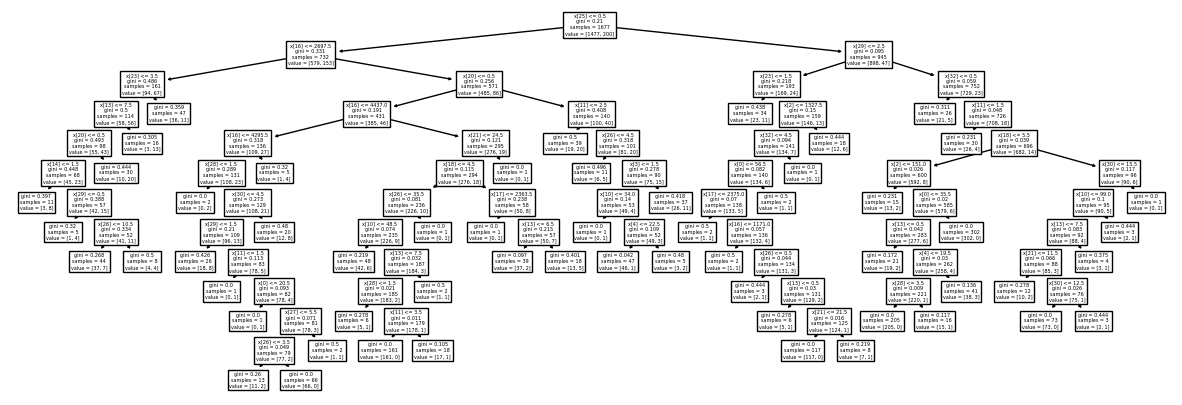

In [12]:
plt.figure(figsize=(15,5))
tree.plot_tree(dt)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test =train_test_split(X,y, test_size=0.2,shuffle=True,stratify=df["Attrition"])

In [14]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def cross_validation(X,y,estimator,n_splits):

    skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)
    
    acc_scr = []
    f1_scr = []
    auc_scr = []
    

    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
        
        estimator.fit(X_train,y_train)
        
        y_preds = estimator.predict(X_test)
        
        acc_scr.append(accuracy_score(y_test,y_preds))
        f1_scr.append(f1_score(y_test,y_preds))
        auc_scr.append(roc_auc_score(y_test,estimator.predict_proba(X_test)[:, 1])) 
    
    avg_acc = round(np.mean(acc_scr),4)
    avg_f1 = round(np.mean(f1_scr),4)
    avg_roc = round(np.mean(auc_scr),4)
        
    print(f"Average accuracy score of {n_splits} is : {avg_acc}")
    print(f"Average f1 score of {n_splits} is       : {avg_f1}")
    print(f"Average roc score of {n_splits} is      : {avg_roc}")
    

In [17]:
param_grid = {'max_features': [None],
              'ccp_alpha': [0.0, 0.001],
              'max_depth' : [3,5,7,9,11,13,15,17,19],
              'criterion' :['gini'],
              'min_samples_split' : [20,50,100,150,200,250,300,350,400],
              'max_leaf_nodes' : [50,100,150,200,250,None]
              
             }
dt = DecisionTreeClassifier(random_state=42)

grid_dt = GridSearchCV(estimator=dt,
                       param_grid=param_grid,
                       cv=5,
                       verbose=True,
                       scoring="f1")
grid_dt_d = GridSearchCV(estimator=dt,
                       param_grid=param_grid,
                       cv=5,
                       verbose=True,
                       scoring="f1")

In [18]:
grid_dt.fit(X,y)
grid_dt_d.fit(Xd,yd)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.001], 'criterion': ['gini'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': [None],
                         'max_leaf_nodes': [50, 100, 150, 200, 250, None],
                         'min_samples_split': [20, 50, 100, 150, 200, 250, 300,
                                               350, 400]},
             scoring='f1', verbose=True)

In [19]:
grid_dt.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_split': 20}

In [20]:
print(grid_dt.best_score_)
print(grid_dt_d.best_score_)

0.28491786680631925
0.7858560564117644


In [21]:
estimator = grid_dt.best_estimator_
estimator_d = grid_dt_d.best_estimator_
cross_validation(X,y,estimator,10)

Average accuracy score of 10 is : 0.8485
Average f1 score of 10 is       : 0.2877
Average roc score of 10 is      : 0.6797


In [22]:
cross_validation(Xd,yd,estimator_d,10)

Average accuracy score of 10 is : 0.8524
Average f1 score of 10 is       : 0.8021
Average roc score of 10 is      : 0.9267


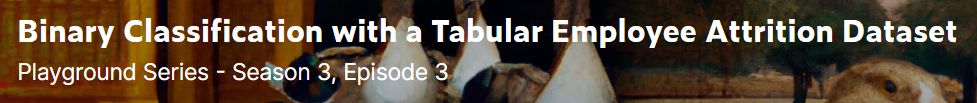
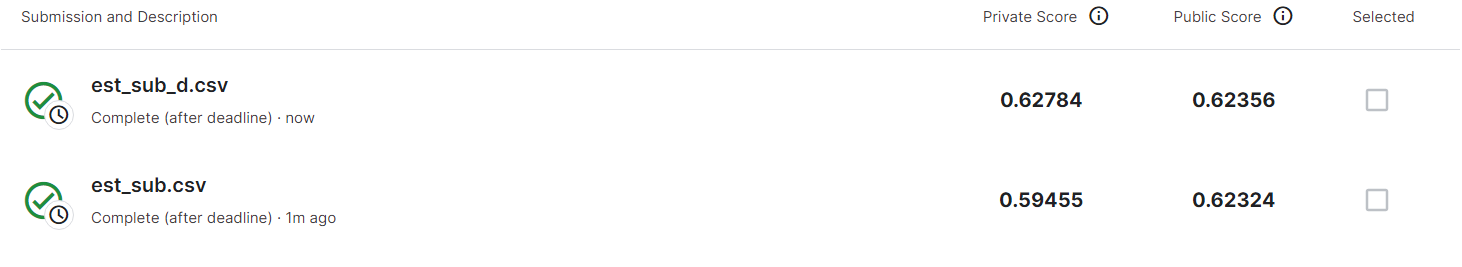

adding duplicate data of Attrition is = 1, improved the score just for decision tree

In [31]:
samp_sub = pd.read_csv("dataset/sample_submission.csv")
samp_sub["Attrition"] = estimator_d.predict(xtest)
samp_sub.to_csv("est_sub_d.csv", index=False)

In [ ]:
plt.figure(figsize=(15,5))
tree.plot_tree(estimator)
plt.show()

In [ ]:
estimator.feature_importances_

In [ ]:
indices = estimator.feature_importances_.argsort()

for index in indices[::-1]:
    
    feature = X.columns[index]
    feature_wt = round(estimator.feature_importances_[index]/np.sum(estimator.feature_importances_)*100,1)
    
    print(f"For index {index:2d} For feature {feature:<21} the weight is {feature_wt:.1f}%")
    
    if index == 26:
        break

In [ ]:
df.groupby(["StockOptionLevel","Attrition"])["Attrition"].count()